<a href="https://colab.research.google.com/github/LiTaokui/TensorFlow-Example/blob/main/Example04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##In this case, I'm trying to build a neural network to predict the location and severity of a I beam(UKC 152*89). Let's get started!!!##

In [3]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read in datasets
beam = pd.read_csv("/content/ANN I beam data.csv.csv")
beam

,N.F.1,N.F.2,N.F.3,N.F.4,N.F.5,d/h,l/L
0,19.157,29.225,47.187,50.454,72.801,0.492126,0.133333
1,19.203,29.488,47.252,50.906,73.793,0.472441,0.133333
2,19.248,29.787,47.342,51.338,74.941,0.452756,0.133333
3,19.283,30.035,47.404,51.750,76.004,0.433071,0.133333
4,19.320,30.358,47.490,52.114,77.416,0.413386,0.133333
...,...,...,...,...,...,...,...
95,18.298,30.771,47.700,52.062,81.508,0.098425,0.500000
96,18.308,30.782,47.716,52.554,81.532,0.078740,0.500000
97,18.321,30.803,47.734,53.056,81.554,0.059055,0.500000
98,20.238,36.147,48.381,55.698,81.683,0.039370,0.500000


In [5]:
beam["N.F.1"], beam["l/L"]

(0     19.157
 1     19.203
 2     19.248
 3     19.283
 4     19.320
        ...  
 95    18.298
 96    18.308
 97    18.321
 98    20.238
 99    20.293
 Name: N.F.1, Length: 100, dtype: float64, 0     0.133333
 1     0.133333
 2     0.133333
 3     0.133333
 4     0.133333
         ...   
 95    0.500000
 96    0.500000
 97    0.500000
 98    0.500000
 99    0.500000
 Name: l/L, Length: 100, dtype: float64)

In [6]:
df = pd.DataFrame(beam)

In [7]:
# create X & y values (features and labels)
X = df.loc[0:99,['N.F.1', 'N.F.2','N.F.3','N.F.4','N.F.5']]
X

,N.F.1,N.F.2,N.F.3,N.F.4,N.F.5
0,19.157,29.225,47.187,50.454,72.801
1,19.203,29.488,47.252,50.906,73.793
2,19.248,29.787,47.342,51.338,74.941
3,19.283,30.035,47.404,51.750,76.004
4,19.320,30.358,47.490,52.114,77.416
...,...,...,...,...,...
95,18.298,30.771,47.700,52.062,81.508
96,18.308,30.782,47.716,52.554,81.532
97,18.321,30.803,47.734,53.056,81.554
98,20.238,36.147,48.381,55.698,81.683


In [8]:
y = df.loc[0:99,['d/h','l/L']]
y

,d/h,l/L
0,0.492126,0.133333
1,0.472441,0.133333
2,0.452756,0.133333
3,0.433071,0.133333
4,0.413386,0.133333
...,...,...
95,0.098425,0.500000
96,0.078740,0.500000
97,0.059055,0.500000
98,0.039370,0.500000


In [9]:
# create training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y_test)

(100, 80, 20, 20)

In [10]:
X_train

,N.F.1,N.F.2,N.F.3,N.F.4,N.F.5
55,19.073,31.655,43.366,47.157,74.976
88,18.215,30.653,47.603,48.266,80.942
26,19.824,31.746,43.809,46.826,77.552
42,20.246,35.413,47.530,52.651,78.001
69,19.310,32.568,47.334,51.862,79.287
...,...,...,...,...,...
60,19.185,32.054,46.885,47.252,77.202
71,19.331,32.662,47.384,52.829,79.578
14,19.505,32.966,48.100,54.505,81.388
92,18.258,30.710,47.646,50.505,81.353


In [11]:
y_train

,d/h,l/L
55,0.393701,0.400000
88,0.236220,0.500000
26,0.472441,0.266667
42,0.157480,0.266667
69,0.118110,0.400000
...,...,...
60,0.295276,0.400000
71,0.078740,0.400000
14,0.216535,0.133333
92,0.157480,0.500000


In [12]:
# build a neural network
tf.random.set_seed(42)

# 1. create a model
beam_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. compile the model
beam_model.compile(loss=tf.keras.losses.mae,
          optimizer=tf.keras.optimizers.SGD(),
          metrics=["mae"])

# 3. fit the model
beam_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 4s 5ms/step - loss: 85.1136 - mae: 85.1136
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 4.3386 - mae: 4.3386
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2289 - mae: 0.2289
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1536 - mae: 0.1536
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1545 - mae: 0.1545
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2816 - mae: 0.2816
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1892 - mae: 0.1892
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.2273 - mae: 0.2273
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1308 - mae: 0.1308
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1139 - mae: 0.1139
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.110

In [13]:
# evaluate it
beam_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 115ms/step - loss: 0.1011 - mae: 0.1011


[0.10114441066980362, 0.10114441066980362]

In [14]:
y_train.median(), y_train.mean()

(d/h    0.246063
 l/L    0.400000
 dtype: float64, d/h    0.249754
 l/L    0.330000
 dtype: float64)

## Now let's try to improve our model!!!


In [15]:
# add an extra layer

# set random seed
tf.random.set_seed(42)

# 1. create the model
beam_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. compile the model
beam_model_2.compile(loss=tf.keras.losses.mae,
          optimizer=tf.keras.optimizers.Adam(),
          metrics=["mae"])

# 3. fit the model
beam_model_2.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 8.8877 - mae: 8.8877
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 3.1010 - mae: 3.1010
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 2.9135 - mae: 2.9135
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 3.3798 - mae: 3.3798
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 2.1568 - mae: 2.1568
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 2.0233 - mae: 2.0233
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 2.6228 - mae: 2.6228
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 2.3652 - mae: 2.3652
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 1.9247 - mae: 1.9247
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 2.1009 - mae: 2.1009
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 2.2077 

In [16]:
# evaluate it
beam_model_2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 94ms/step - loss: 1.0663 - mae: 1.0663


[1.0662992000579834, 1.0662992000579834]

## seems like overfitting!

In [17]:
# training for longer

# set random seed
tf.random.set_seed(42)

# 1. create the model
beam_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(2)
])

# 2. compile the model
beam_model_3.compile(loss=tf.keras.losses.mae,
          optimizer=tf.keras.optimizers.Adam(),
          metrics=["mae"])

# 3. fit the model
beam_model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
3/3 [==============================] - 0s 5ms/step - loss: 31.5213 - mae: 31.5213
Epoch 2/500
3/3 [==============================] - 0s 4ms/step - loss: 29.1117 - mae: 29.1117
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 26.7178 - mae: 26.7178
Epoch 4/500
3/3 [==============================] - 0s 4ms/step - loss: 24.3468 - mae: 24.3468
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 21.9863 - mae: 21.9863
Epoch 6/500
3/3 [==============================] - 0s 4ms/step - loss: 19.6510 - mae: 19.6510
Epoch 7/500
3/3 [==============================] - 0s 4ms/step - loss: 17.3286 - mae: 17.3286
Epoch 8/500
3/3 [==============================] - 0s 4ms/step - loss: 15.0266 - mae: 15.0266
Epoch 9/500
3/3 [==============================] - 0s 4ms/step - loss: 12.7617 - mae: 12.7617
Epoch 10/500
3/3 [==============================] - 0s 4ms/step - loss: 11.4044 - mae: 11.4044
Epoch 11/500
3/3 [==============================] - 0s 4ms/

## Not as good as first model.



## Preprocessing the data(normalization and standardization)

In [18]:
X

,N.F.1,N.F.2,N.F.3,N.F.4,N.F.5
0,19.157,29.225,47.187,50.454,72.801
1,19.203,29.488,47.252,50.906,73.793
2,19.248,29.787,47.342,51.338,74.941
3,19.283,30.035,47.404,51.750,76.004
4,19.320,30.358,47.490,52.114,77.416
...,...,...,...,...,...
95,18.298,30.771,47.700,52.062,81.508
96,18.308,30.782,47.716,52.554,81.532
97,18.321,30.803,47.734,53.056,81.554
98,20.238,36.147,48.381,55.698,81.683


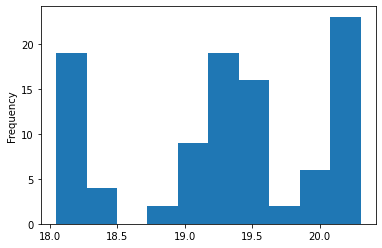

In [19]:
X["N.F.1"].plot(kind="hist")

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in the insurance dataframe
beam = pd.read_csv("/content/ANN I beam data.csv.csv")
beam

,N.F.1,N.F.2,N.F.3,N.F.4,N.F.5,d/h,l/L
0,19.157,29.225,47.187,50.454,72.801,0.492126,0.133333
1,19.203,29.488,47.252,50.906,73.793,0.472441,0.133333
2,19.248,29.787,47.342,51.338,74.941,0.452756,0.133333
3,19.283,30.035,47.404,51.750,76.004,0.433071,0.133333
4,19.320,30.358,47.490,52.114,77.416,0.413386,0.133333
...,...,...,...,...,...,...,...
95,18.298,30.771,47.700,52.062,81.508,0.098425,0.500000
96,18.308,30.782,47.716,52.554,81.532,0.078740,0.500000
97,18.321,30.803,47.734,53.056,81.554,0.059055,0.500000
98,20.238,36.147,48.381,55.698,81.683,0.039370,0.500000


In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["N.F.1", "N.F.2", "N.F.3", 'N.F.4', "N.F.5"]), # turn all values in these columns between 0 and 1
)

# create X and y values
df = pd.DataFrame(beam)
X = df.loc[0:99,['N.F.1', 'N.F.2','N.F.3','N.F.4','N.F.5']]
y = df.loc[0:99,['d/h','l/L']]

# build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the colum transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [25]:
# build a neural network to fit on our normalized data
tf.random.set_seed(42)

# 1. create the model
beam_model_4 = tf.keras.Sequential([
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# 2. compile the model
beam_model_4.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

# 3. fit the model
history = beam_model_4.fit(X_train_normal, y_train, epochs=1000)

Epoch 1/1000
3/3 [==============================] - 1s 6ms/step - loss: 0.2874 - mae: 0.2874
Epoch 2/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.2820 - mae: 0.2820
Epoch 3/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.2775 - mae: 0.2775
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 0.2732 - mae: 0.2732
Epoch 5/1000
3/3 [==============================] - 0s 9ms/step - loss: 0.2685 - mae: 0.2685
Epoch 6/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.2639 - mae: 0.2639
Epoch 7/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.2599 - mae: 0.2599
Epoch 8/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.2557 - mae: 0.2557
Epoch 9/1000
3/3 [==============================] - 0s 5ms/step - loss: 0.2513 - mae: 0.2513
Epoch 10/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.2468 - mae: 0.2468
Epoch 11/1000
3/3 [==============================] - 0s 5ms/step - lo

In [26]:
# evaluate our model trained on normalized data
beam_model_4.evaluate(X_test_normal, y_test)

1/1 [==============================] - 0s 146ms/step - loss: 0.0754 - mae: 0.0754


[0.07540682703256607, 0.07540682703256607]

Text(0.5, 0, 'epochs')

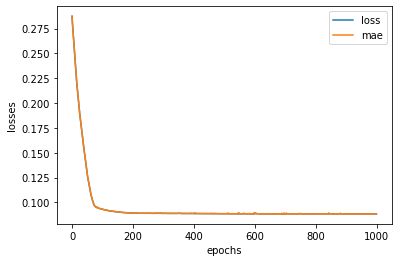

In [27]:
# plot history(also know as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("losses")
plt.xlabel("epochs")

## Our model has been improved a little bit!